In [1]:
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt
import warnings
%matplotlib inline


# HW 2:  Root Finding and Optimization

## Question 1 - Fun with Fixed Point iteration

Let's say that we wanted to calculate $\sqrt{M}$ given that $M \in \mathbb{R}$ and $M > 0$ and that we did not want to use the function `sqrt` directly.  Consider the function 

$$
    f(x) = x^2 - M
$$

which has a positive root at at $x=\sqrt{M}$.   Here we will try to solve this using  fixed point iteration

$$
    x_{k+1} = g(x_k)
$$
for several different iteration functions $g(x)$ (see below)

For each function $g$:

- Confirm analytically that $x=\sqrt{M}$ is a fixed point of $g(x)$
- Analyze the convergence behavior close to the fixed-point and determine the stability of the iterative scheme
- Now set $M=3$  and $x_0 = 2$.  Make a nicely labeled convergence plot showing the log of the relative error as a function of iteration. How many iterations are required to reduce the relative error to machine precision (if it converges)?

**Remember**: if you want to write $g^\prime$, remember to use `g^\prime` rather than `g'` in $\LaTeX$

**(a)** [4] To help with the last part,  write a short python function to return N iterations of a fixed point iteration.

In [3]:
def fixed_point(g, x0, N=5):
    """
    Conduct N iterations of the fixed point iteration x_{k+1} = g(x_k)
    
    Parameters:
    -----------
    g : function
        The iteration function g(x).
    x0 : float
        Initial guess for the iteration.
    N : int, optional
        Number of iterations (default is 5).
    
    Returns:
    --------
    numpy array
        Array containing the iterations [x0, x1, ..., xN].
    """
    # Initialize the array to store the iteration values
    x = numpy.zeros(N + 1)
    x[0] = x0
    
    # Perform N iterations
    for k in range(1, N + 1):
        x[k] = g(x[k - 1])  # Apply the iteration function
    
    return x


In [ ]:
### Free cell for messing with your code

In [4]:
# Testing Cell

N = 5
g = lambda x: numpy.cos(x)
x0 = 1.
answer = numpy.array([1., 0.54030231, 0.85755322, 0.65428979, 0.79348036, 0.70136877])

x = fixed_point(g, x0, N )
numpy.testing.assert_allclose(x, answer)
print('success: passed N=5 test')

x_true = 0.7390851332153119
x = fixed_point(g, x0, 1000)
numpy.testing.assert_almost_equal(x[-1],x_true)
print('success: passed N=1000 test')

success: passed N=5 test
success: passed N=1000 test


**(b)** [6] analyze the problem with 
$$ g(x) = 1 + x - \frac{x^2}{M}$$

We are given the iterative method:

$$
x_{k+1} = g(x_k) = 1 + x_k - \frac{x_k^2}{M}
$$

where we aim to compute $\sqrt{M}$ by finding the fixed point of $g(x)$.

### 1. **Fixed Point Analysis**

We first confirm that $\sqrt{M}$ is a fixed point of the iteration.

To find the fixed point, set $x = g(x)$:

$$
x = 1 + x - \frac{x^2}{M}
$$

Simplifying:

$$
0 = 1 - \frac{x^2}{M}
$$

$$
x^2 = M
$$

$$
x = \pm \sqrt{M}
$$

Thus, $x = \sqrt{M}$ and $x = -\sqrt{M}$ are fixed points of $g(x)$.

### 2. **Convergence Analysis**

To analyze the convergence of this iteration scheme near the fixed point $x = \sqrt{M}$, we calculate the derivative $g'(x)$ and evaluate it at $x = \sqrt{M}$.

#### Derivative of $g(x)$:

$$
g'(x) = \frac{d}{dx} \left( 1 + x - \frac{x^2}{M} \right) = 1 - \frac{2x}{M}
$$

#### Evaluate at $x = \sqrt{M}$:

$$
g'(\sqrt{M}) = 1 - \frac{2\sqrt{M}}{M} = 1 - \frac{2}{\sqrt{M}}
$$

For convergence, we need $|g'(x)| < 1$ near $x = \sqrt{M}$. The condition for convergence becomes:

$$
\left| 1 - \frac{2}{\sqrt{M}} \right| < 1
$$

Let's simplify this:

#### Case 1: $M > 1$
For $M > 1$, we have $\sqrt{M} > 1$, so the term $\frac{2}{\sqrt{M}}$ is less than 2. Thus:

$$
1 - \frac{2}{\sqrt{M}} > -1
$$

and

$$
1 - \frac{2}{\sqrt{M}} < 1
$$

Thus, for $M > 1$, the convergence condition holds, and the iteration converges.

#### Case 2: $M < 1$
For $M < 1$, $\sqrt{M} < 1$, and $\frac{2}{\sqrt{M}} > 2$. This violates the condition $|g'(\sqrt{M})| < 1$, meaning that the iteration **does not converge for $M < 1$** and may diverge.

### Conclusion:
- The fixed points are $x = \pm \sqrt{M}$.
- The iteration converges for $M > 1$ but does **not converge for $M < 1$**.


C:\Users\apanc\AppData\Local\Temp\ipykernel_19040\2731428970.py:25: RuntimeWarning: divide by zero encountered in log10
  plt.plot(numpy.arange(N+1), numpy.log10(errors), marker='o')


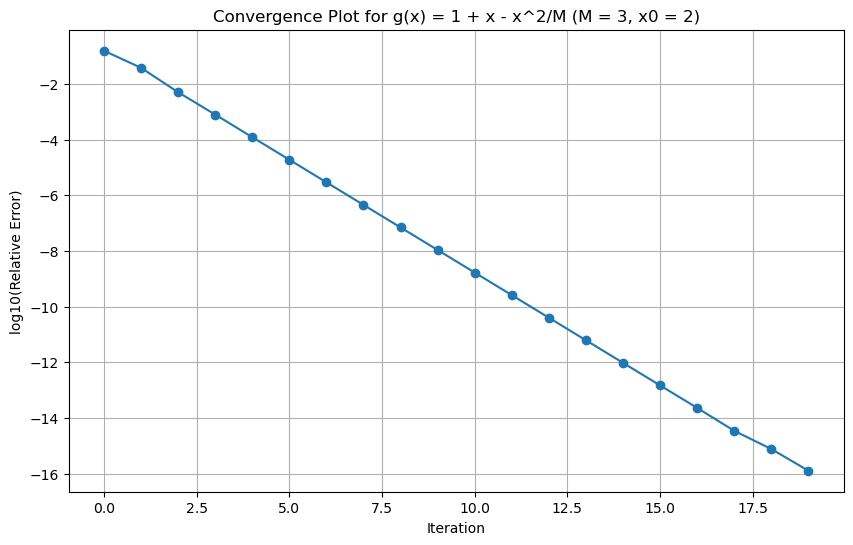

In [5]:
def g(x, M):
    """Iteration function g(x) = 1 + x - x^2 / M"""
    return 1 + x - (x**2) / M

def relative_error(x, true_value):
    """Compute the relative error"""
    return abs(x - true_value) / true_value

# Parameters
M = 3
x_true = numpy.sqrt(M)  # True value of sqrt(M)
x0 = 2  # Initial guess
N = 20  # Number of iterations

# Fixed-point iteration using g(x)
x_values = fixed_point(lambda x: g(x, M), x0, N)

# Compute relative errors
errors = [relative_error(xk, x_true) for xk in x_values]

# Plot log of relative errors
plt.figure(figsize=(10, 6))
plt.plot(numpy.arange(N+1), numpy.log10(errors), marker='o')
plt.xlabel('Iteration')
plt.ylabel('log10(Relative Error)')
plt.title(f'Convergence Plot for g(x) = 1 + x - x^2/M (M = {M}, x0 = {x0})')
plt.grid(True)
plt.show()

 **(c)** [6] analyze the problem with 
$$ g(x) = \frac{M}{x}$$

We are given the iterative method:

$$
x_{k+1} = g(x_k) = \frac{M}{x_k}
$$

where we aim to compute $\sqrt{M}$ by finding the fixed point of $g(x)$.

### 1. **Fixed Point Analysis**

We first confirm that $\sqrt{M}$ is a fixed point of the iteration.

To find the fixed point, set $x = g(x)$:

$$
x = \frac{M}{x}
$$

Multiplying both sides by $x$:

$$
x^2 = M
$$

Thus, $x = \pm \sqrt{M}$. Therefore, $x = \sqrt{M}$ (and $x = -\sqrt{M}$) are fixed points of $g(x)$.

### 2. **Convergence Analysis**

To analyze the convergence behavior near the fixed point $x = \sqrt{M}$, we calculate the derivative $g'(x)$ and evaluate it at $x = \sqrt{M}$.

#### Derivative of $g(x)$:

$$
g'(x) = \frac{d}{dx} \left( \frac{M}{x} \right) = -\frac{M}{x^2}
$$

#### Evaluate at $x = \sqrt{M}$:

$$
g'(\sqrt{M}) = -\frac{M}{(\sqrt{M})^2} = -1
$$

Since $|g'(\sqrt{M})| = 1$, this suggests **neutral convergence** near $x = \sqrt{M}$. When the derivative magnitude is exactly 1, it indicates that the method may converge very slowly, and depending on the initial guess, it could even fail to converge or exhibit oscillatory behavior (the latter of which we actually see in the graph later).

### 3. **Stability of the Iteration**

The fact that $|g'(\sqrt{M})| = 1$ means that the fixed point is a **marginally stable point**.

- This is problematic because fixed-point iterations typically require $|g'(x)| < 1$ for fast, reliable convergence.

### 4. **Conclusion**
- The fixed points are $x = \pm \sqrt{M}$.
- The iteration is unlikely to converge quickly due to $|g'(\sqrt{M})| = 1$, indicating marginal stability.
- The method might exhibit slow convergence or oscillatory behavior, especially if the initial guess is far from $\sqrt{M}$.


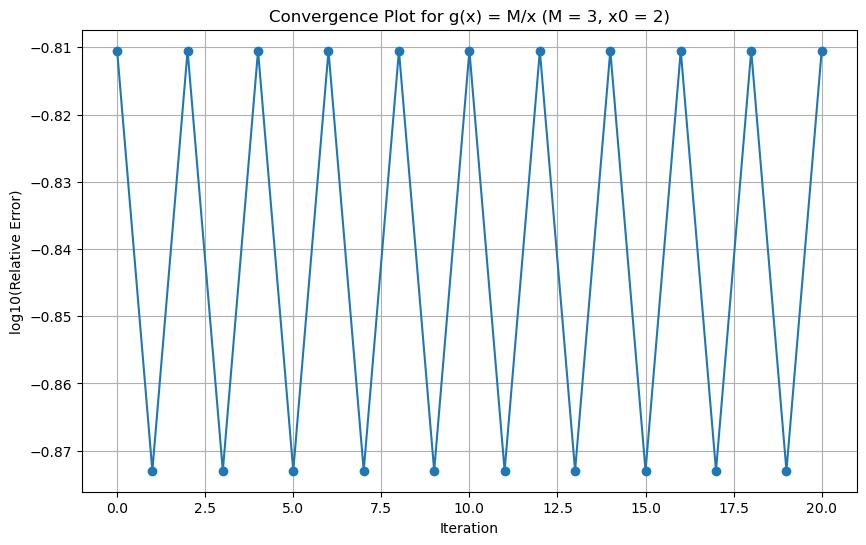

In [6]:
def g(x, M):
    """Iteration function g(x) = M / x"""
    return M / x

def relative_error(x, true_value):
    """Compute the relative error"""
    return abs(x - true_value) / true_value

def fixed_point(g, x0, N=20):
    """
    Conduct N iterations of the fixed point iteration x_{k+1} = g(x_k)
    
    Parameters:
    -----------
    g : function
        The iteration function g(x).
    x0 : float
        Initial guess for the iteration.
    N : int, optional
        Number of iterations (default is 20).
    
    Returns:
    --------
    numpy array
        Array containing the iterations [x0, x1, ..., xN].
    """
    # Initialize the array to store the iteration values
    x = numpy.zeros(N + 1)
    x[0] = x0
    
    # Perform N iterations
    for k in range(1, N + 1):
        x[k] = g(x[k - 1])  # Apply the iteration function
    
    return x

# Parameters
M = 3
x_true = numpy.sqrt(M)  # True value of sqrt(M)
x0 = 2  # Initial guess
N = 20  # Number of iterations

# Fixed-point iteration using g(x)
x_values = fixed_point(lambda x: g(x, M), x0, N)

# Compute relative errors
errors = [relative_error(xk, x_true) for xk in x_values]

# Plot log of relative errors
plt.figure(figsize=(10, 6))
plt.plot(numpy.arange(N+1), numpy.log10(errors), marker='o')
plt.xlabel('Iteration')
plt.ylabel('log10(Relative Error)')
plt.title(f'Convergence Plot for g(x) = M/x (M = {M}, x0 = {x0})')
plt.grid(True)
plt.show()

**(d)** [6] Newton's method
$$ g(x) = x - \frac{f}{f^\prime}$$

with $$ f = x^2 - M$$

We are given Newton's method:

$$
x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}
$$

where $f(x) = x^2 - M$ and $f'(x) = 2x$, with the goal of finding $\sqrt{M}$.

### 1. **Fixed Point Analysis**

Substituting $f(x) = x^2 - M$ and $f'(x) = 2x$ into Newton's method:

$$
x_{k+1} = x_k - \frac{x_k^2 - M}{2x_k}
$$

Simplifying this expression:

$$
x_{k+1} = \frac{x_k}{2} + \frac{M}{2x_k}
$$


To confirm that $\sqrt{M}$ is a fixed point, set $x = g(x)$:

$$
x = \frac{x}{2} + \frac{M}{2x}
$$

Multiplying both sides by 2:

$$
2x = x + \frac{M}{x}
$$

$$
x = \frac{M}{x}
$$

Multiplying both sides by $x$:

$$
x^2 = M
$$

Thus, $x = \pm \sqrt{M}$. Therefore, $x = \sqrt{M}$ (and $x = -\sqrt{M}$) are fixed points.

### 2. **Convergence Analysis**

Newton's method is known for its **quadratic convergence**, meaning that once the iterates are close to the root $\sqrt{M}$, the number of correct digits roughly doubles with each iteration.

#### Derivative of $g(x)$:

The iteration function can be written as:

$$
g(x) = \frac{x}{2} + \frac{M}{2x}
$$

Taking the derivative:

$$
g'(x) = \frac{1}{2} - \frac{M}{2x^2}
$$

At $x = \sqrt{M}$:

$$
g'(\sqrt{M}) = \frac{1}{2} - \frac{M}{2(\sqrt{M})^2} = \frac{1}{2} - \frac{M}{2M} = \frac{1}{2} - \frac{1}{2} = 0
$$

Since $g'(\sqrt{M}) = 0$, Newton's method converges **quadratically** near the fixed point $x = \sqrt{M}$.

### 3. **Conclusion**

- The fixed points are $x = \pm \sqrt{M}$.
- Newton's method converges quadratically, meaning it converges very quickly once the iterates are close to the solution.
- The method is highly reliable and efficient for computing $\sqrt{M}$, especially when starting from a reasonable initial guess.
- The graph shows rapid convergence within 3 iterations and demonstrates that Newton's method achieves machine precision very efficiently.


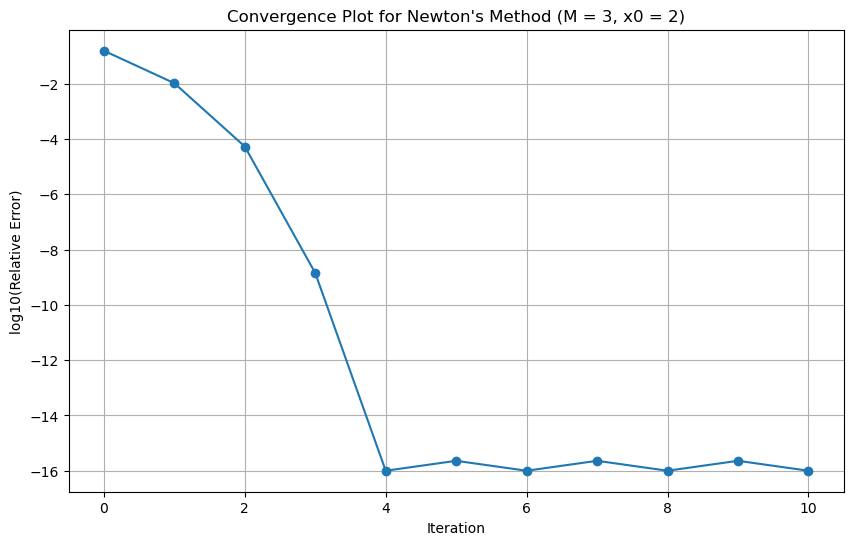

In [3]:
def newton_method(f, df, x0, N=20):
    """
    Conduct N iterations of Newton's method x_{k+1} = x_k - f(x_k) / f'(x_k)
    
    Parameters:
    -----------
    f : function
        The function f(x) = x^2 - M.
    df : function
        The derivative of the function, f'(x) = 2x.
    x0 : float
        Initial guess for the iteration.
    N : int, optional
        Number of iterations (default is 20).
    
    Returns:
    --------
    numpy array
        Array containing the iterations [x0, x1, ..., xN].
    """
    x = numpy.zeros(N + 1)
    x[0] = x0
    
    # Perform N iterations of Newton's method
    for k in range(1, N + 1):
        x[k] = x[k - 1] - f(x[k - 1]) / df(x[k - 1])
    
    return x

# Define the function f(x) = x^2 - M and its derivative f'(x) = 2x
M = 3
f = lambda x: x**2 - M
df = lambda x: 2*x

# Parameters
x_true = numpy.sqrt(M)  # True value of sqrt(M)
x0 = 2  # Initial guess
N = 10  # Number of iterations

# Newton's method
x_values = newton_method(f, df, x0, N)

# Compute relative errors
errors = numpy.array([abs(xk - x_true) / x_true for xk in x_values])

# Plot log of relative errors, adding epsilon to avoid log10(0)
epsilon = 1e-16
plt.figure(figsize=(10, 6))
plt.plot(numpy.arange(N+1), numpy.log10(errors + epsilon), marker='o')
plt.xlabel('Iteration')
plt.ylabel('log10(Relative Error)')
plt.title(f'Convergence Plot for Newton\'s Method (M = {M}, x0 = {x0})')
plt.grid(True)
plt.show()

## Question 2 - Fun with Rootfinders and NewtSafe

This problem will explore the behavior of a range of different rootfinding routines against  a more challenging rootfinding problem.  Feel free to use any or all  of the routines presented in class which have been included in an auxiliary python file `rootfinding_optimization_schemes.py`


You need to have this file in the same directory with your homework for this notebook to import it.

In [ ]:
#  Cell to import and test at least newton's method from class

from  rootfinding_optimization_schemes import newton

# set test function and its derivative
f = lambda x: numpy.cos(x) - x
f_prime = lambda x: -numpy.sin(x) - 1.

#set initial guess and call newton
x0 = 1.
x, x_array = newton(f, f_prime, x0,tol=1.e-12)

# run tests
answer = 0.7390851332151606
N = 5
numpy.testing.assert_almost_equal(x, answer)
numpy.testing.assert_almost_equal(N, len(x_array))
print("functions loaded correctly")

Consider the function 

$$
    f(x) = \cos(x) +  N(x, A, \alpha, \beta))
$$
where

$$
    N(x, A, \alpha, \beta) =  A\left[\sin(\alpha x) + \sin(\beta x)\right]
$$

is a function that adds smooth additive "noise" with fixed amplitude $A = 0.05$ and varying frequencies $\alpha$ and $\beta$

**(a)** [4] Make a nicely labeled plot to showing the behavior of this function for 
* $\alpha = 0.$, $\beta =0.$
* $\alpha = 4.$, $\beta =5.$
* $\alpha = 27$, $\beta = 50$

over the domain $x\in[-2\pi, 2\pi]$. Make sure you have enough points to resolve the wiggles.  You can plot all three curves on the same plot

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

**(b)** [4] Explore the behavior of the following rootfinding routines 
* bisection
* newton
* secant
* brentq method using scipy.optimize.root_scalar
* **EXTRA CREDIT** any other method used in root_scalar

for finding a root of this function, given the bracket $x\in[x_0, x_1]$ with $x_0 = 0.2$, $x_1 = 2.$ for each ($\alpha, \beta$) pair

`params = [ (0., 0.), (4., 5.),  (27, 50.) ]`

For each routine,  report
* the root found $x^*$
* the value of $f$ at the root $f(x^*$)
* the number of iterations.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

**(c)** [4] Make a convergence plot showing the relative error at each step for Newton's method for the same three parameter pairs and initial guess $x_0 = 0.2$.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

**(d)** [4] Briefly explain your results so far for all the methods.  Feel free to play with other initial parameters or to make additional plots.  

YOUR ANSWER HERE

**(e)** [6] Write a controlled Newton routine `NewtSafe`,  that finds a root with an initial bracket by combining newton steps with a bisection routine.  The basic algorithm is to first try Newton from the midpoint of the bracket.  If Newton predicts a solution outside of the bracket, ignore it and take a bisection step instead.  You can use and modify any of the rootfinding routines I presented in class, but write a decent docstring and raise appropriate exceptions as necessary. 

The routine should return the best estimate of the root and number of Newton Steps and the number of bisection steps

`x, N_newt, N_bisection = newtsafe(f, f_prime, a, b)`

In [ ]:
def newtsafe(f,f_prime,a,b,tol = 1.e-6, max_steps=1000):
    """ Please improve this docstring
        
    
    Parameters:
    -----------
    
    f: function (float)
        function returning f(x)
    f_prime:  function (float)
        function returning derivative of f with respect to x
    a: float
        left bracket a < x
    b: float
        right bracket x < b
        
        Note:  the signs of f(a) and f(b) must be different to insure a bracket
    tol: float
        tolerance.  Returns when |f(x)| < tol
    max_steps: int
        maximum number of iteration steps
        
    Returns:
    --------
    x: float
        midpoint of final bracket
    n_newt:  number of newton steps for successful newton iteration
    n_bisection: number of bisection steps
        
    Raises:
    -------
    ValueError:  
        if initial bracket is invalid 
    Warning: 
        if number of iterations exceed MAX_STEPS
    Prints warning if Newton exceeds the bracket
    
    """
# YOUR CODE HERE
raise NotImplementedError()


In [ ]:
# you can play with your code here

In [ ]:
# Testing Cell
from  rootfinding_optimization_schemes import newton
from scipy.optimize import root_scalar

a = 27
b = 50
A = 0.3
f = lambda x: numpy.cos(x) + A*(numpy.sin(a * x) + numpy.sin(b * x))
f_prime = lambda x: -numpy.sin(x) + A*(a*numpy.cos(a * x) + b*numpy.cos(b * x))

pi = numpy.pi

brackets = [ 
            (-0.68309670780092, 2.642524050776319),
            (-0.7104536143852529, 3.8152626763086603),
            (-0.5236057894835726, 3.9067882124238986),
            (-0.5275356434135271, 2.4988039593212776),
            (-0.3534683303763972, 3.9130408021252014)
           ]

for bracket in brackets:
    #a = numpy.random.uniform(low=-pi/4, high=pi/4)
    #b = numpy.random.uniform(low=3*pi/4, high=5*pi/4)
    a = bracket[0]
    b = bracket[1]
    x_n, x_array = newton(f, f_prime, (a + b)/2.)
    x_ns, N_n, N_b = newtsafe(f, f_prime, a, b)
    sol = root_scalar(f, bracket=(a, b),method='brentq')
    print('Bracket  = [{}, {}]'.format(a, b))
    print('Newton   = {},    N   = {}'.format(x_n, len(x_array)-1))
    print('NewtSafe = {},    N_n = {}, N_b = {}'.format(x_ns, N_n, N_b))
    print('brentq   = {},    N   = {}'.format(sol.root, sol.iterations))
    print()
    numpy.testing.assert_almost_equal(x_ns, sol.root,decimal=5)
    
try:
    x_ns, N_n, N_b = newtsafe(f, f_prime, 1.6, 2.0)
except ValueError as err:
    print(err)
    pass

print('success!')


## Question 3 - Solve a "real" rootfinding problem

In Homework 2, I asked you to *estimate* the number of terms in the taylor expansion of $e^x$ such that the relative error was less than $\epsilon_{mach}$.  This was essentially a non-linear problem in the number of steps $n$.  Here we will use a rootfinder to get this number more precisely.

**(a)** [8] provide a numerical solution for the number of terms $n$ in the Taylor polynomial expansion of exp(x) (i.e. $T_N(x))$ such that the relative error is

$$
    r = \left| \frac{x^{n+1}}{(n + 1)!} \right| \approx \epsilon_{mach}
$$ 

Give solutions for x = 0.1, 1., 10. ,100. , 709., 1000. and compare your numerical solution to the approximate solution given in last homework 

$$
    n > e*x
$$

by calculating the relative error between the your numerical solution and your simpler estimate.

Note: To make this problem easier, just use Stirling’s approximation $\log(n!) \approx n \log n − n$. which will work quite well.  However, for a little bit of extra credit solve this for the full problem and compare solutions.


YOUR ANSWER HERE

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()